In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/CostoPersonalesSeguros.csv')

In [3]:
# Nombre de las columnas
df.columns

# age : Información de la edad de cada observacion
# sex : Sexo
# bmi : Indice de masa corporal
# children : numero de hijos
# smoker  : fuma o no fuma
# region : Información geografica
# charges : costos de una poliza de seguros


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.shape
# Numero de filas: 1338
# Numero de columnas: 7

(1338, 7)

In [5]:
df.head(n = 8)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560


In [6]:
df.sample(20)

,age,sex,bmi,children,smoker,region,charges
818,47,female,26.125,1,yes,northeast,23401.30575
436,22,male,31.730,0,no,northeast,2254.79670
638,39,male,26.410,0,yes,northeast,20149.32290
258,51,male,24.415,4,no,northwest,11520.09985
1276,22,female,30.400,0,no,northeast,2741.94800
897,19,male,25.555,1,no,northwest,2221.56445
1198,40,male,29.355,1,no,northwest,6393.60345
21,30,female,32.400,1,no,southwest,4149.73600
1328,23,female,24.225,2,no,northeast,22395.74424
735,49,female,34.770,1,no,northwest,9583.89330


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.age.dtype

dtype('int64')

In [9]:
# Crearemos listas con los nombres de las variables cuantitativas y cualitativas
ListaVarNumericas = []
ListaVarCualitativas = []

# Necesito una estrutura repetitiva para barrer los nombre de las columnas
# y asi poder filtrar/separar (gracias al metodo dtype) las variables por su tipo
for NombreCol in df.columns:
    print('Nombre de la columna: %s \tTipo de dato: %s' %(NombreCol, df[NombreCol].dtype))
    if df[NombreCol].dtype == 'int64' or df[NombreCol].dtype == 'float64':
        ListaVarNumericas.append(NombreCol)
    else:
        ListaVarCualitativas.append(NombreCol)
print('lista var. cualitativas')
print(ListaVarNumericas)
print('lista var. cuantitativa')
print(ListaVarCualitativas)


Nombre de la columna: age 	Tipo de dato: int64
Nombre de la columna: sex 	Tipo de dato: object
Nombre de la columna: bmi 	Tipo de dato: float64
Nombre de la columna: children 	Tipo de dato: int64
Nombre de la columna: smoker 	Tipo de dato: object
Nombre de la columna: region 	Tipo de dato: object
Nombre de la columna: charges 	Tipo de dato: float64
lista var. cualitativas
['age', 'bmi', 'children', 'charges']
lista var. cuantitativa
['sex', 'smoker', 'region']


In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot: >

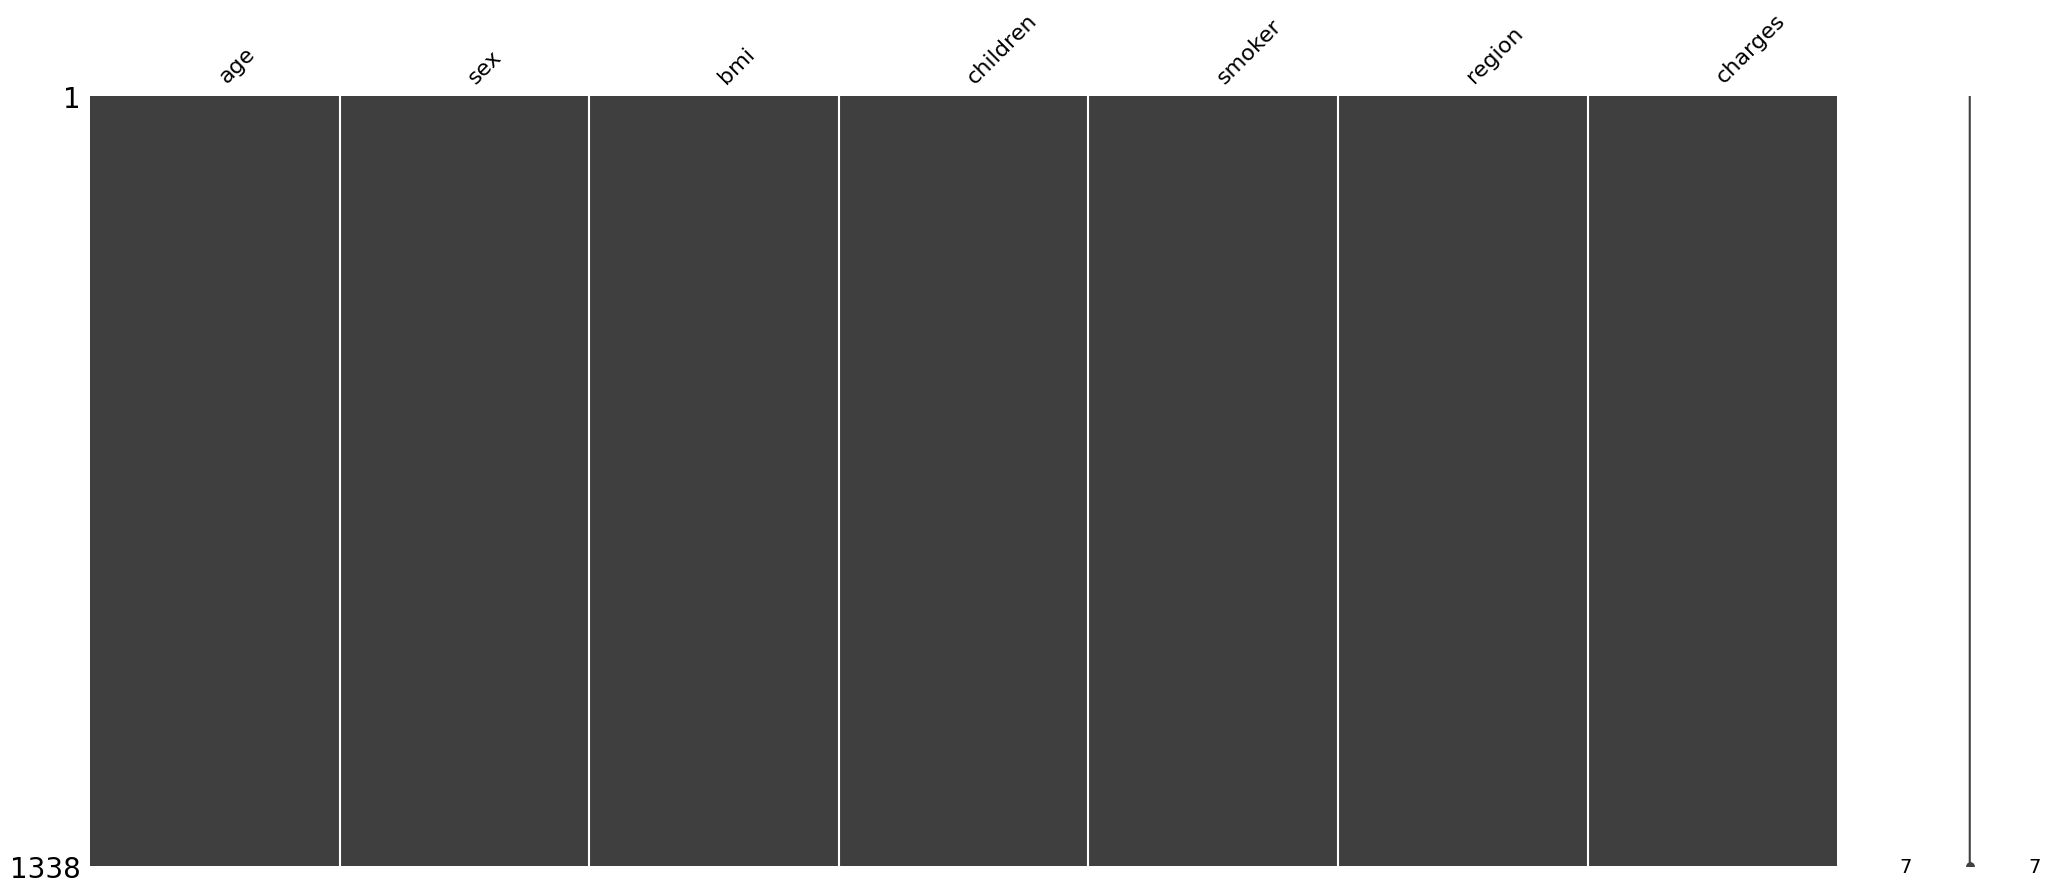

In [11]:
import missingno
missingno.matrix(df)


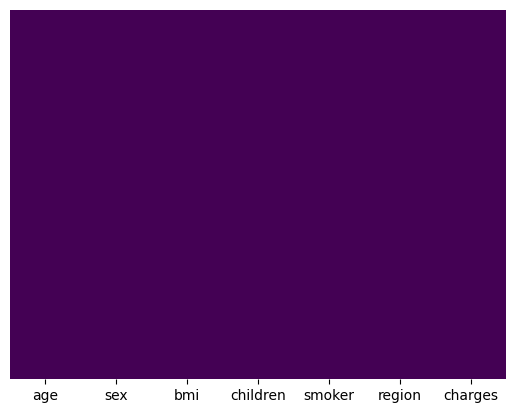

In [14]:
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap='viridis',
    yticklabels=False
)

plt.show()


In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\ldanl\AppData\Local\Temp\ipykernel_20844\2148730078.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  MatCorr = df.corr()


<AxesSubplot: >

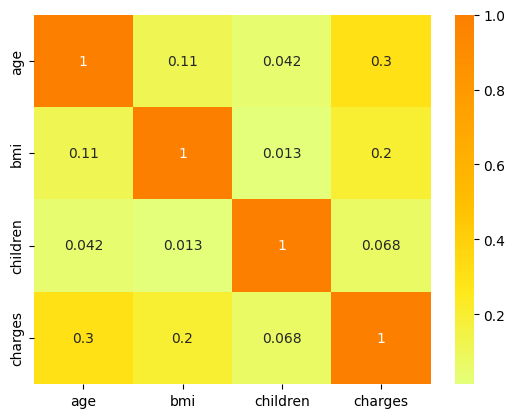

In [19]:
MatCorr = df.corr()
sns.heatmap(
    MatCorr,
    cmap='Wistia',
    annot=True
)

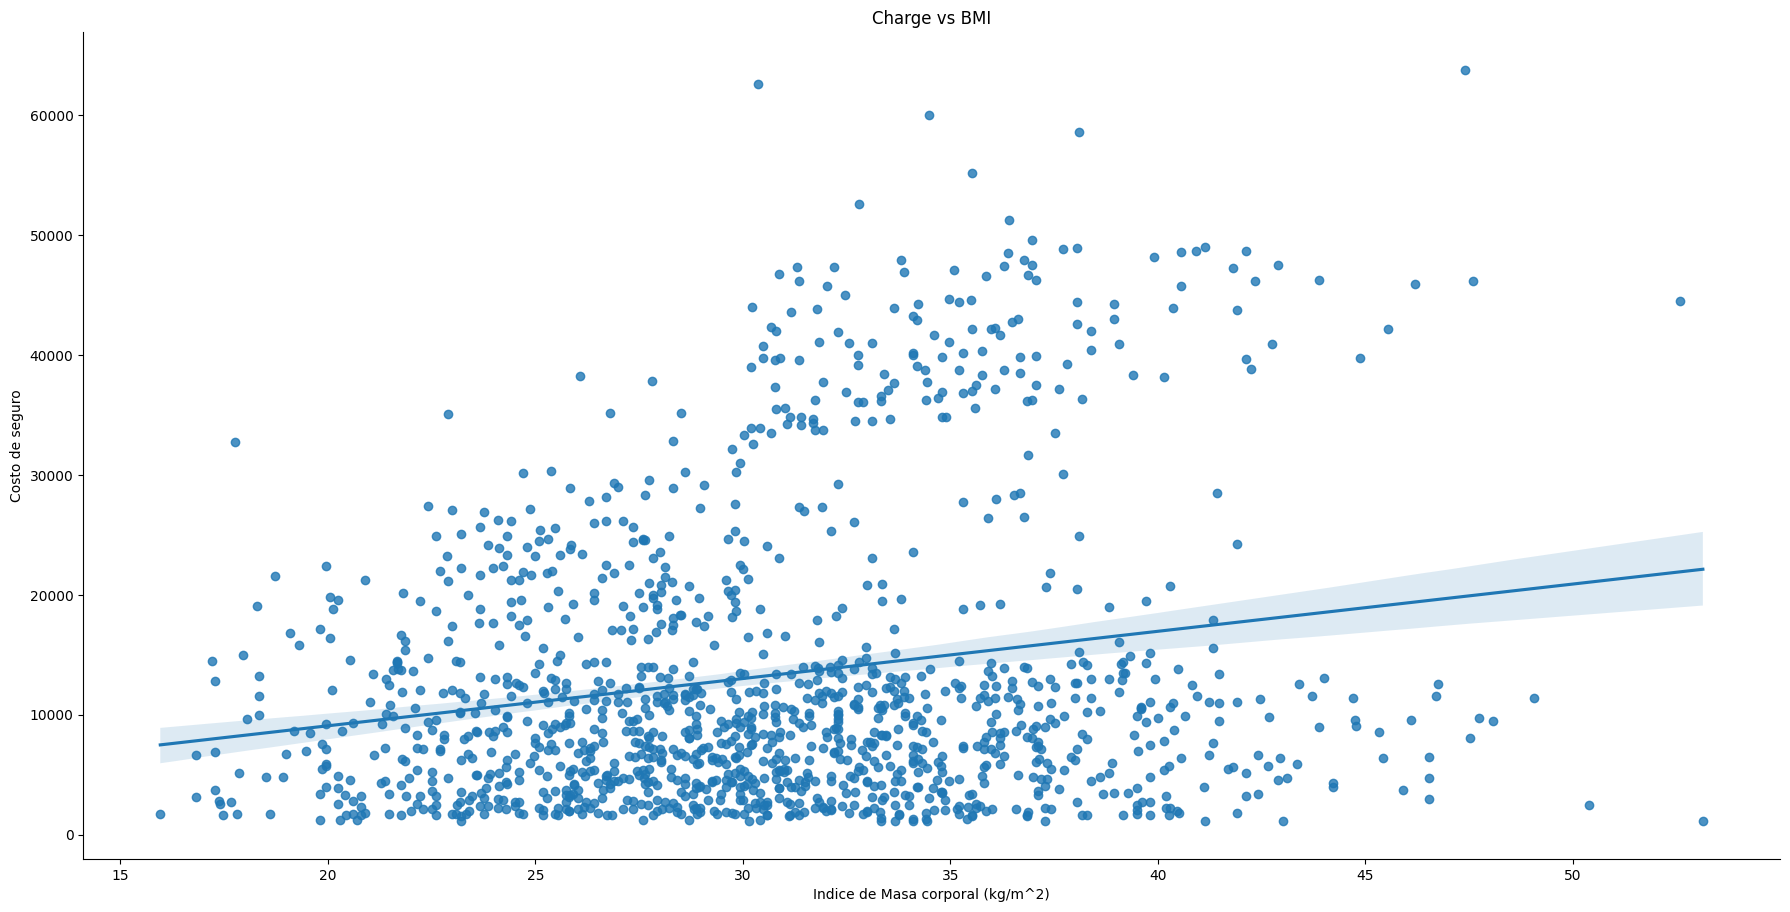

In [24]:
sns.lmplot(
    data=df,
    x='bmi',
    y='charges',
    height=9,
    aspect=2
)
plt.xlabel('Indice de Masa corporal (kg/m^2)')
plt.ylabel('Costo de seguro')
plt.title('Charge vs BMI')

plt.show()

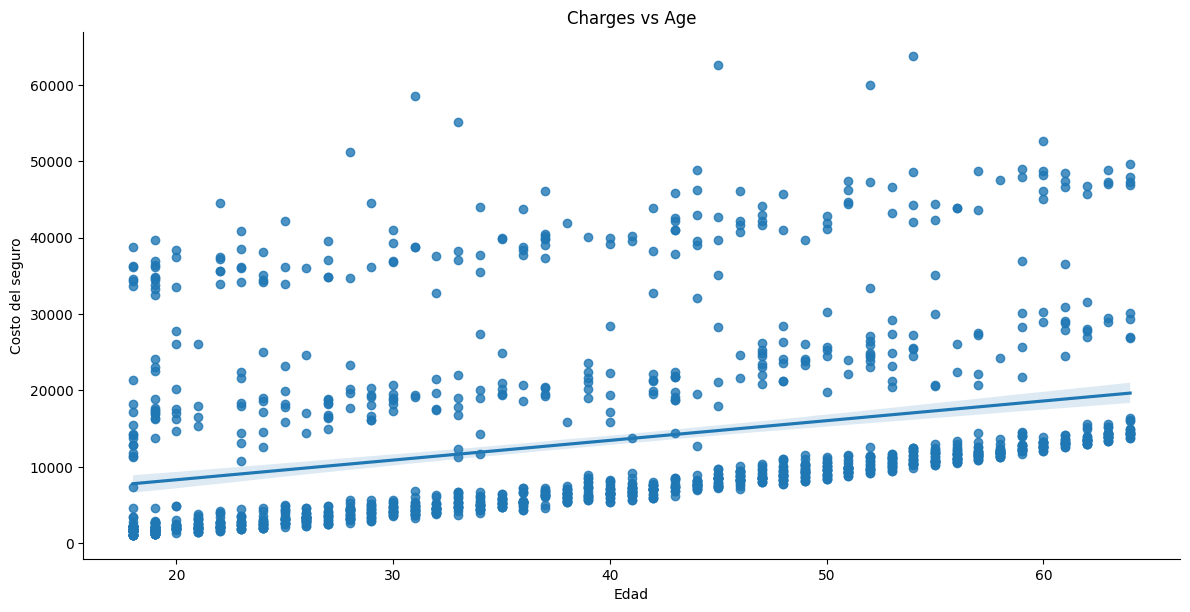

In [26]:
sns.lmplot(
    data = df,
    x= 'age',
    y='charges',
    height=6,
    aspect=2
)
plt.xlabel('Edad')
plt.ylabel('Costo del seguro')
plt.title('Charges vs Age')

plt.show()

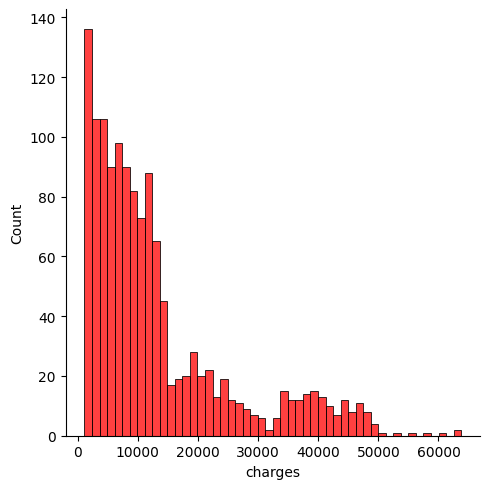

In [36]:
sns.displot(
    df.charges,
    bins = 50,
    color='red'
)
plt.show()

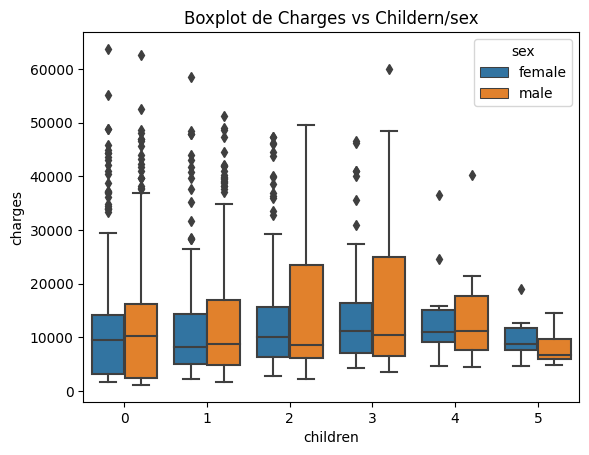

In [37]:
sns.boxplot(
    data=df,
    x='children',
    y='charges',
    hue='sex',
)
plt.title('Boxplot de Charges vs Childern/sex')
plt.show()